# The Heart of the Matter: Analyzing Predictors of Heart Disease



## Introduction

Heart disease is the number 1 cause of deaths worldwide, with no 'cure' of any kind. We can, however, try to identify possible factors that lead to higher risk of heart disease. We obtained a set of data collected by Robert Detrano, (M.D., Ph.D.) from the Long Beach and Cleveland Clinic Foundation. This data set contains a total of 76 attributes, of which 14 are used as primary data. We will be using this data to craft a model that attempts to predict whether or not age, sex, total cholestoral levels, maximum heart rate and number of major vessels affected by flourosopy affect the diagnosis of heart disease. 

## Methods and Results

We chose these variables age, sex,  total cholestoral levels, maximum heart rate and number of major vessels affected by flourosopy as we believe these will be the most important determining factors of the diagnosis of heart disease. This was decided upon using recommendations from the World Health Organization regarding cardiovascular diseases (WHO 2021). Another influence for choosing these variables dealt with replicability of this kind of data analysis. By using variables that use common measurable medical differences and characteristics, we are able to see if the instance of heart disease can be predicted accurately from easily available data. Also, these variables seem to have some correlations with the diagnosis of heart disease as our preliminary EDA shows. This suggests that these variables could be good predictor variables in our KNN-classification model, which gives us some confidence to use these variables in training our model.

We used k-nearest neighbours classification algorithm to predict the instance of heart disease with our chosen factors. The columns (variables) that we will be using are age (age), sex (sex), cholesterol level (chol), maximum heart rate achieved (thalach), number of major vessels colored by flourosopy (ca), and the diagnosis of heart disease (num). For clarity, sex is a binary variable that is coded as male = 1, woman = 0. Cholesterol is measured in mg/dl. Number of major vessels is measured from 0-3. The diagnosis is initially measured from 0-4: 0 indicating no presence and 1-4 indicated presence of heart disease. To simplify our data analysis and make this project manageable, we decided to predict only the presence of heart disease instead of predicting four levels 0-4. We mutated the `num` variable to a binary categorical variable where 0 indicates no diagnosis and 1 indicates diagnosis. 
 
We found the best number of neighbours `k` using cross validation with seven folds to achieve a better accuracy. Accuracy was determined by how correctly our model can predict the presence of heart disease with unseen data (testing set).

One way to visualize our results is to create a scatterplot between two variables that were found to have a significant influence in prediction with the color function to indicate the instance of heart disease or not. This will help explain why our model works (or doesn’t work very well) because we can see the relationships between the predictors and the target variable. Unfortunately, we were unable to execute this visualization because we did not have the means or knowledge to do so – our knowledge is limited to visualizations with 1 major variable involved. 
 
Another way to assess how well the model predicts the instance of heart disease is a confusion matrix. This confusion matrix will tell us the frequency of type I and type II error. This will be able to show us the accuracy of our model with our four chosen predictors. 
 
Our confusion matrix shows that 41 out of 49 observations were correctly predicted to not have heart disease, while 34 out of 42 observations were correctly predicted to have heart disease. This leaves 8 false positives (predicts to have heart disease but does not have heart disease, type I error) and 8 false negatives (predicts to not have heart disease but does have heart disease, type II error). From a macroscopic view, our model has a higher probability to predict a false negative (8/42) than a false positive (8/49). 
 
Since this data set contains 161 observations without heart disease and 138 observations with heart disease, the majority classifier will classify every observation as “no heart disease”. However, since we only have about 54% of healthy observations, our model performs much better than the majority classifier. 

### Loading and cleaning data, and preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(tidymodels)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [21]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
download.file(url, destfile = "data/processed.cleveland.data")
heart_df <- read_csv("data/processed.cleveland.data", col_name = FALSE)
col <- c("age", "sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal","num")
colnames(heart_df) <- col

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We will extract the columns that we need and prepare them for analysis. Make the "num" variable binary by reducing the number of categories.

In [4]:
filheart_df <- select(heart_df, -cp, -trestbps, -fbs, -restecg, -exang, -oldpeak, -slope, -thal)


heart_num0 <- filheart_df |>
filter(num == 0)
heart_num1 <- filheart_df |>
filter(num > 0) |>
mutate(num = 1)

heart_clean <- rbind(heart_num0, heart_num1)
heart_clean <- heart_clean |>
mutate(num = as_factor(num), ca = as.integer(ca), sex = as_factor(sex))
head(heart_clean, 4)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,sex,chol,thalach,ca,num
<dbl>,<fct>,<dbl>,<dbl>,<int>,<fct>
63,1,233,150,0,0
37,1,250,187,0,0
41,0,204,172,0,0
56,1,236,178,0,0


Figure 1.1: Cleaned and filtered data set that is ready for data analysis.

In [5]:
# Here we use prop = 0.7

set.seed(100)

heart_clean <- drop_na(heart_clean)

split <- initial_split(heart_clean, prop = 0.7, strata = num)
heart_train <- training(split)
heart_test <- testing(split)
# head(heart_train)
# head(heart_test)

#### Summary of predictor variables
We report counts for categorical variables and means for quantitative variables as well as the number of NA values for each variable.

In [6]:
set.seed(100)
num_counts <- heart_train |>
    group_by(num) |>
    summarize(Count = n()) |>
    rename(Diagnosis = num)
ca_counts <- heart_train |>
    group_by(ca) |>
    summarize(Count = n()) |>
    rename(`Number of major vessels` = ca)
means_by_num  <- heart_train %>%
    group_by(num) %>%
    summarize(`Mean age` = mean(age), `Mean cholesterol level` = mean(chol), `Mean maximum heart rate` = mean(thalach)) |>
    rename(Diagnosis = num)

In [7]:
num_counts

Diagnosis,Count
<fct>,<int>
0,112
1,96


Figure 1.2: Diagnosis counts of the data set where 0 indicates no diagnosis of heart disease and 1 otherwise.

In [8]:
ca_counts

Number of major vessels,Count
<int>,<int>
0,129
1,42
2,23
3,14


Figure 1.3: Flourosopy counts of the data set.


In [9]:
means_by_num

Diagnosis,Mean age,Mean cholesterol level,Mean maximum heart rate
<fct>,<dbl>,<dbl>,<dbl>
0,51.57143,238.8304,158.2143
1,56.47917,254.1562,140.3854


Figure 1.4: Means of age,  cholesterol level and maximum heart rate given diagnosis of heart disease. 

#### Visualizing preliminary exploratory data analysis
We visualize the distribution of each column. Some rough trends can be observed just by colouring based on the presence of heart disease.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



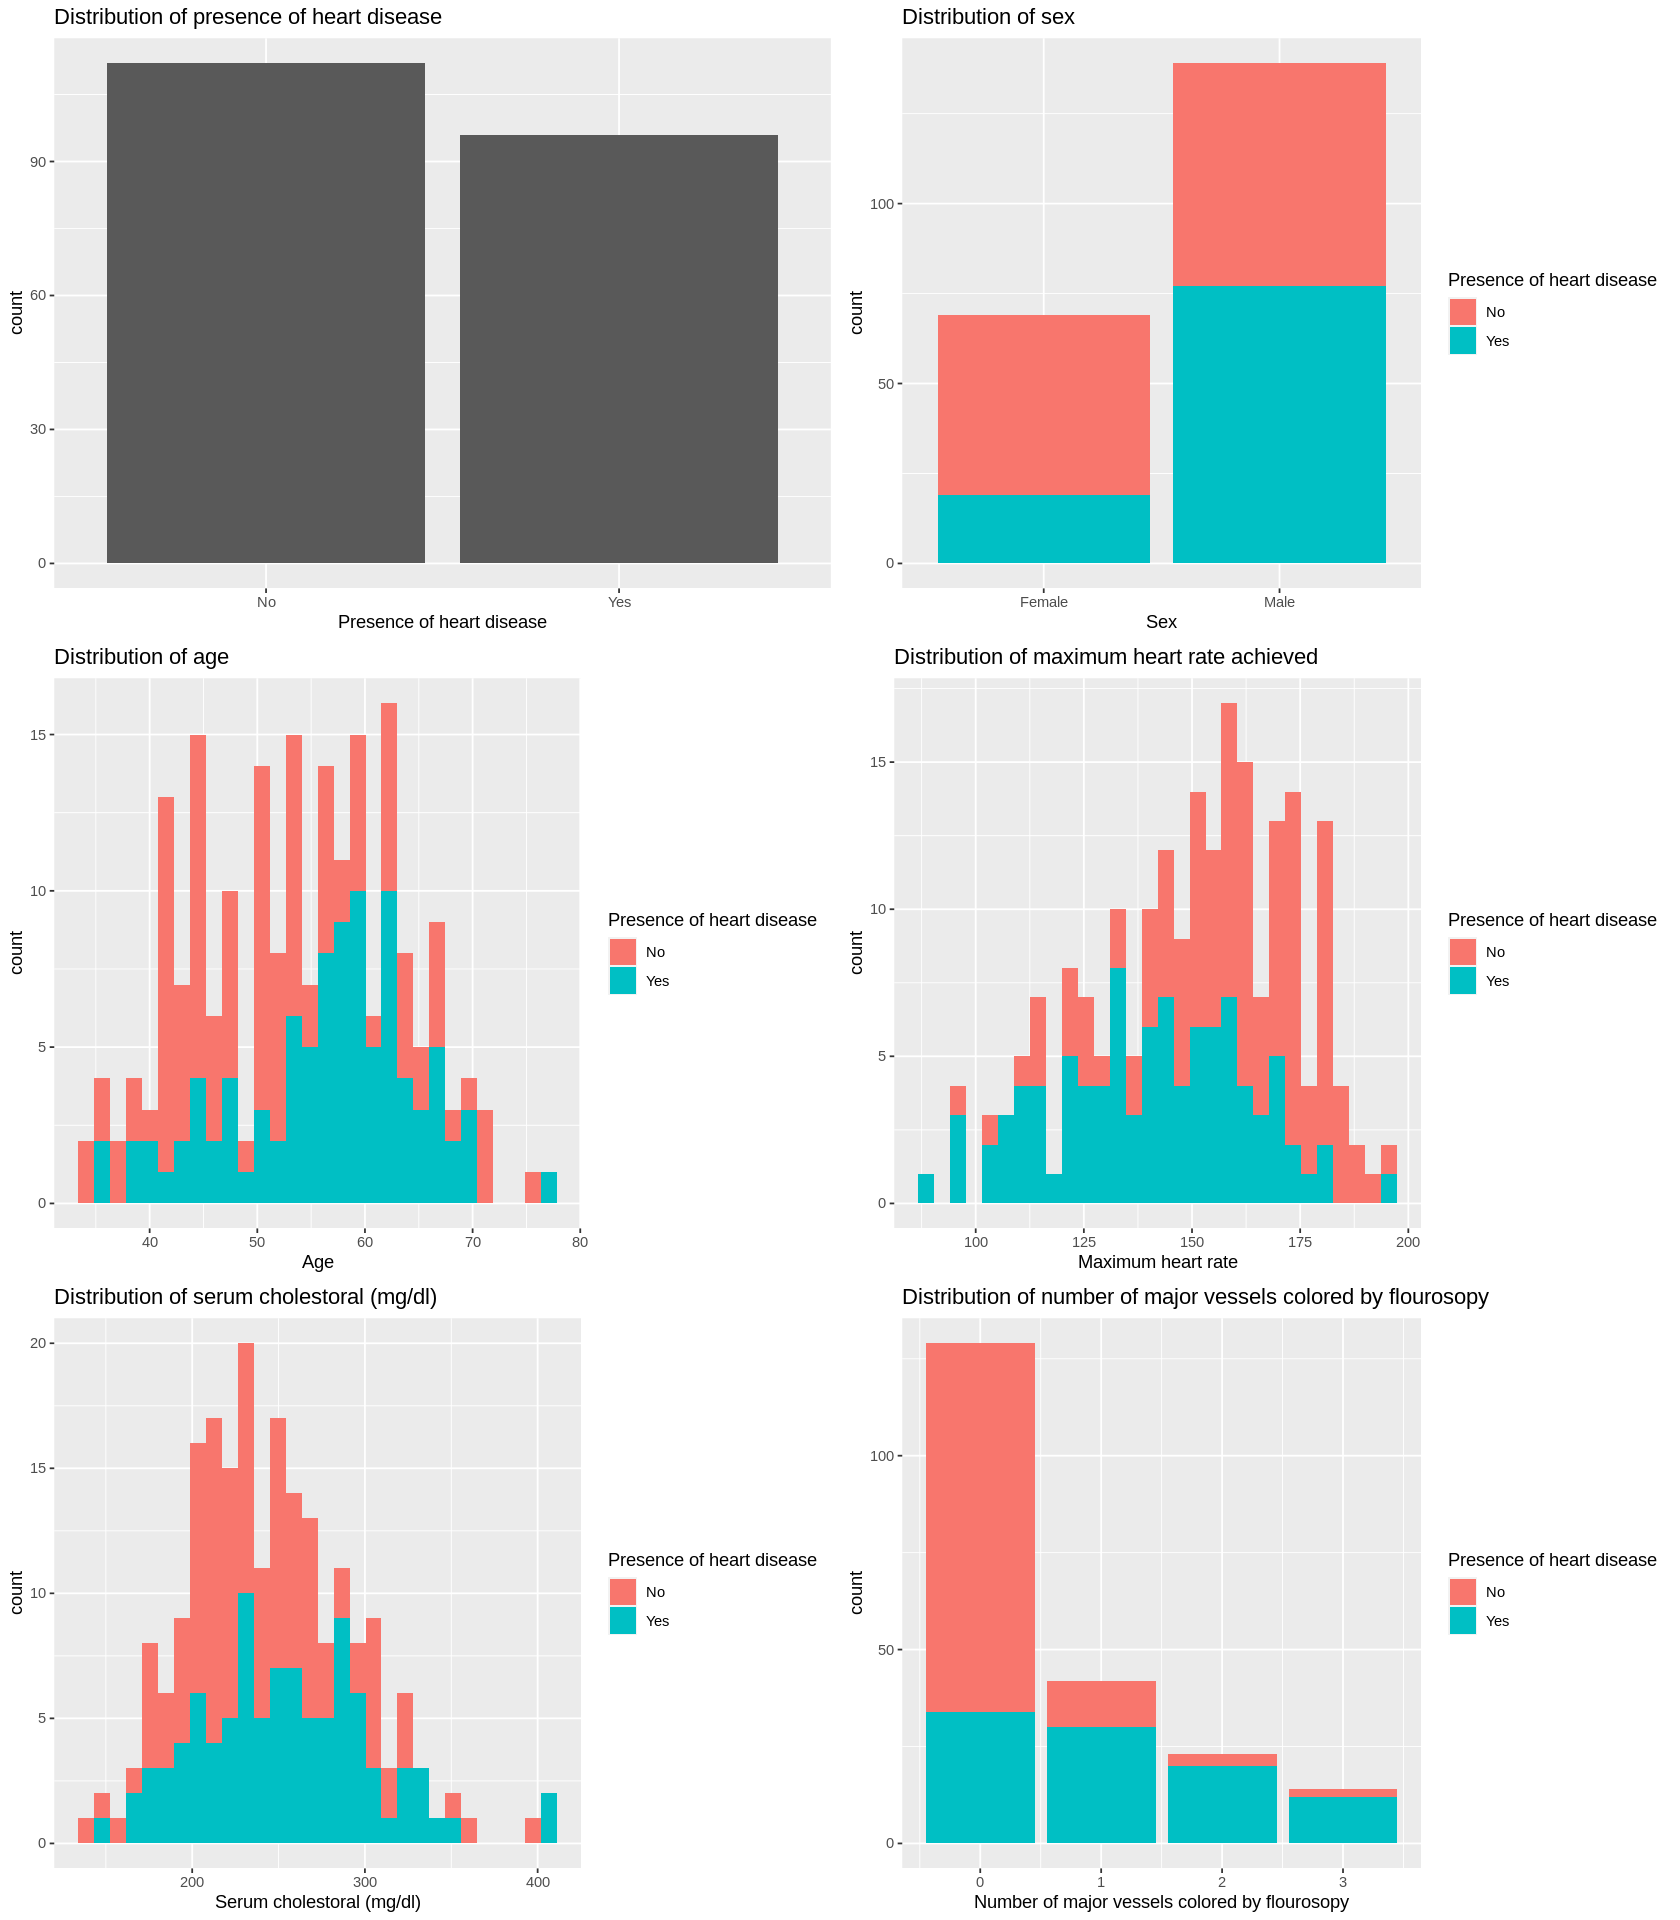

In [10]:
set.seed(100)
num_plot <- ggplot(heart_train, aes(x = num)) +
    geom_bar() +
    labs(x = "Presence of heart disease", title = "Distribution of presence of heart disease")+
    scale_x_discrete(labels = c('No','Yes'))

sex_plot <- ggplot(heart_train, aes(x= sex, fill = num)) +
    geom_bar(position = "stack") + 
    labs(x = "Sex", title = "Distribution of sex", fill = "Presence of heart disease") +
    scale_fill_hue(labels = c("No", "Yes"))+
    scale_x_discrete(labels = c('Female','Male'))


age_plot <- ggplot(heart_train, aes(x= age, fill = num)) +
    geom_histogram(position = "stack") +
    labs(x = "Age", title = "Distribution of age", fill = "Presence of heart disease") +
    scale_fill_hue(labels = c("No", "Yes"))


chol_plot <- ggplot(heart_train, aes(x= chol, fill = num)) +
    geom_histogram(position = "stack") +
    labs(x = "Serum cholestoral (mg/dl)", title = "Distribution of serum cholestoral (mg/dl)", fill = "Presence of heart disease") +
    scale_fill_hue(labels = c("No", "Yes"))


thalach_plot <- ggplot(heart_train, aes(x= thalach, fill = num)) +
    geom_histogram(position = "stack") +
    labs(x = "Maximum heart rate", title = "Distribution of maximum heart rate achieved", fill = "Presence of heart disease") +
    scale_fill_hue(labels = c("No", "Yes"))


ca_plot <- ggplot(heart_train, aes(x= ca, fill = num)) +
    geom_bar(position = "stack")+
    labs(x = "Number of major vessels colored by flourosopy", title = "Distribution of number of major vessels colored by flourosopy", fill = "Presence of heart disease") +
    scale_fill_hue(labels = c("No", "Yes"))

options(repr.plot.width = 14, repr.plot.height = 16)
grid.arrange(num_plot, sex_plot, age_plot,thalach_plot, chol_plot, ca_plot, ncol = 2)

Figure 1.5: Distributions of each predictor variable given diagnosis of heart disease.

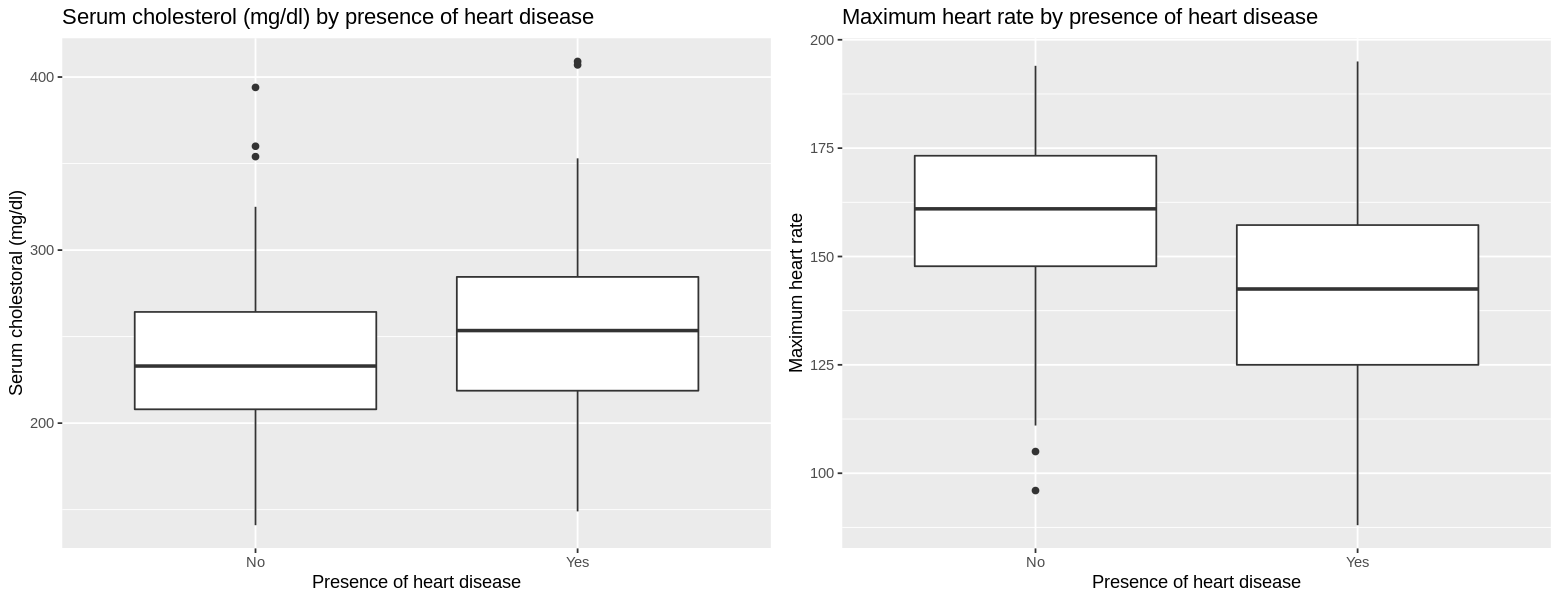

In [11]:
set.seed(100)
chol_box <- ggplot(heart_train, aes(x= num, y=chol)) +
    geom_boxplot() +
    labs(title = 'Serum cholesterol (mg/dl) by presence of heart disease', y = "Serum cholestoral (mg/dl)", x = "Presence of heart disease") +
    scale_x_discrete(labels = c('No','Yes'))

thalach_box <- ggplot(heart_train, aes(x= num, y=thalach)) +
    geom_boxplot() +
    labs(title = 'Maximum heart rate by presence of heart disease', y = "Maximum heart rate", x = "Presence of heart disease") +
    scale_x_discrete(labels = c('No','Yes'))
options(repr.plot.width = 13, repr.plot.height = 5)
grid.arrange(chol_box, thalach_box, ncol = 2)

Figure 1.6: Boxplots of cholesterol and maximum heart rate conditional on presence of heart disease.

If we take a closer look at these two variables with boxplots, we can visualize the difference in strength of association between a predictor and the target variable. This will help us determine which variable is more important than others.

### Training our KNN-classification model

We will determine the best value of neighbors by cross validation.

In [14]:
set.seed(100)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_recipe <- recipe(num ~ age + sex + chol + thalach + ca, data = heart_train) |>
    step_scale(age, chol, thalach, ca) |>
    step_center(age, chol, thalach, ca)

set.seed(100)
heart_vfold <- vfold_cv(heart_train, v = 6, strata = num) 

In [17]:
set.seed(100)
heart_workflow <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec)

In [16]:
set.seed(100)
gridvals <- tibble(neighbors = seq(1, 200))
heart_results <- heart_workflow |>
    tune_grid(resamples = heart_vfold, gridvals) |>
    collect_metrics()

Warning message:
“The `...` are not used in this function but one or more objects were passed: ''”


In [18]:
set.seed(100)
heart_k_min <- heart_results |>
filter(.metric == "accuracy") |>
arrange(desc(mean)) |>
slice(1) 
#select(neighbors)
heart_k_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.7642857,6,0.01751955,Preprocessor1_Model05


Figure 2.1: The number of neighbors that has the highest accuracy in cross validation.

We will run k-nearest neighbors classification based on the best k we have computed.

In [19]:
# use k = 7 here.
set.seed(100)
knn_spec_bestK <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_best_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec_bestK) |>
    fit(data = heart_train)

heart_summary <- heart_best_fit |>
predict(heart_test) |>
bind_cols(heart_test) |>
metrics(truth = num, estimate = .pred_class) |>
filter(.metric == "accuracy")

heart_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8241758


Figure 2.2: The accuracy of our KNN-classification model on testing set.

In [20]:
set.seed(100)
## adding predictions
predictions <- predict(heart_best_fit, heart_test) %>%
    bind_cols(heart_test)
## confusion matrix
heart_confmat <- predictions %>%
    conf_mat(truth = num, estimate = .pred_class)
heart_confmat

          Truth
Prediction  0  1
         0 41  8
         1  8 34

Figure 2.3: The confusion matrix of our KNN-classification model. 

## Discussion

We expected to find that these variables (age, cholesterol level, maximum heart rate achieved, number of major vessels colored by flourosopy, and sex) affect the likelihood of heart disease in patients. Therefore, we expected to see predictive value. 

From our results, we found that the interaction of these four predictors were indeed accurate 82% of the time in predicting the instance of heart disease. Therefore, our expectation about their predictive value was correct. While this average accuracy may seem unsatisfactory due to its serious consequences (especially of diagnosing negative when the true value is positive), it is very similar to other predictive measures currently being used in the medical field. Robert et al. have used a logistic regression classification algorithm for heart disease detection and obtained an accuracy of 77.1% (Muhammad et al.). Wankhade et al. have used a multi-layer perceptron (MLP) classifier for heart disease diagnosis and attained accuracy of 80% (Muhammad et al.). Allahverdi et al. have developed a classification system using artificial neural and real neural networks and attained an accuracy of 82.4% (Muhammad et al.). Therefore, this accuracy is not incompatible with current medical research and trends.

Findings such as this could have an impact on how doctors communicate health risks to patients. It may also affect how patients change their daily life as certain risks may have increased predictive value of a variable, such as cholesterol level. This could be an important area of study, some of which we have found online, about the value of data analysis in heart disease diagnosis.

An important limitation in our model regards the inherent interaction effect of our variables. There is no way to isolate the impact of each variable as we could in a regression context. With regression, we would be able to look at regression coefficients and examine the impact that each variable has on the instance. However, with the outcome of our variable being categorical, we were limited in our model specifications. While this may be a limitation, the implications of our findings are still great. One variable, such as age or sex, does not have much predictive value alone. Therefore, looking at the interaction of these variables inherently will be more explanatory to measure the likelihood of heart disease in the presence of different factors. 

This could lead to future questions about the compounding effect of these variables and all other variables that serve predictive purposes. Knowing how these chosen variables affect the instance of heart disease, questions about other predictive variables such as blood pressure, smoking, or obesity can also be tested individually and together. Interactions between these variables could be a very important part of this data analysis. 

## References

Muhammad, Y., Tahir, M., Hayat, M., & Chong, K. T. (2020). Early and accurate detection and diagnosis of heart disease using intelligent computational model. Scientific reports, 10(1), 1-17.

Cardiovascular diseases. World Health Organization. Retrieved December 4, 2022, from https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1 

R, Detrano, M.D., Ph.D. UCI machine learning repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease 